In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from numba import njit

In [4]:
def compute_return(df):
    log_returns = np.log(df / df.shift(1)).fillna(0)
    log_returns.columns = df.columns  # Keep same names
    return log_returns


In [5]:
root = Path().resolve().parent

general_data=  pd.read_csv(f"{root}/data/clean_data/general_data_with_new_features.csv", index_col= 'Date')

price = [col for col in general_data.columns if col.startswith('Adj')]
stock_price = general_data[price]

stock_price.head()

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_CVX,Adj Close_GOOGL,Adj Close_GS,Adj Close_JNJ,Adj Close_JPM,Adj Close_MSFT,Adj Close_PFE,Adj Close_XOM,Adj Close_XLE,Adj Close_XLF,Adj Close_XLK,Adj Close_XLV
Date,,,,,,,,,,,,,,
2022-07-06,140.663284,114.330002,124.785049,113.888962,271.415039,162.839661,103.496696,259.624359,45.164009,75.138512,61.641098,30.055471,127.007240,123.589432
2022-07-07,144.039139,116.330002,127.213737,118.074867,275.886932,163.022324,106.114395,261.760132,45.737648,77.538483,63.863457,30.491747,129.632874,124.113113
2022-07-08,144.718216,115.540001,126.548943,118.641968,273.918915,162.821396,105.781403,261.038483,45.523602,77.664787,63.836464,30.425360,129.691437,124.484467
2022-07-09,144.718216,115.540001,126.548943,118.641968,273.918915,162.821396,105.781403,261.038483,45.523602,77.664787,63.836464,30.425360,129.691437,124.484467
2022-07-10,144.718216,115.540001,126.548943,118.641968,273.918915,162.821396,105.781403,261.038483,45.523602,77.664787,63.836464,30.425360,129.691437,124.484467


In [6]:
log_returns = compute_return(stock_price)

In [7]:
log_returns

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_CVX,Adj Close_GOOGL,Adj Close_GS,Adj Close_JNJ,Adj Close_JPM,Adj Close_MSFT,Adj Close_PFE,Adj Close_XOM,Adj Close_XLE,Adj Close_XLF,Adj Close_XLK,Adj Close_XLV
Date,,,,,,,,,,,,,,
2022-07-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-07-07,0.023716,0.017342,0.019276,0.036095,0.016342,0.001121,0.024978,0.008193,0.012621,0.031441,0.035418,0.014411,0.020462,0.004228
2022-07-08,0.004703,-0.006814,-0.005240,0.004791,-0.007159,-0.001233,-0.003143,-0.002761,-0.004691,0.001628,-0.000423,-0.002180,0.000452,0.002988
2022-07-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-07-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-27,0.024984,0.024718,0.009403,0.025956,0.028315,0.010561,0.017415,0.023078,0.012359,0.004745,0.008622,0.017430,0.023486,0.013867
2025-05-28,0.001048,-0.006330,-0.013219,-0.003128,-0.011910,-0.005365,-0.006808,-0.007255,-0.018381,-0.013714,-0.012778,-0.006698,-0.004143,-0.005159


In [8]:
moving_assets_mask = (log_returns.ne(0).sum(axis=0) > (len(log_returns) * 0.65)) # the threshold was initially 0.9 but because data doesn't move much we relax to 0.65
moving_assets_mask

Adj Close_AAPL     True
Adj Close_AMZN     True
Adj Close_CVX      True
Adj Close_GOOGL    True
Adj Close_GS       True
Adj Close_JNJ      True
Adj Close_JPM      True
Adj Close_MSFT     True
Adj Close_PFE      True
Adj Close_XOM      True
Adj Close_XLE      True
Adj Close_XLF      True
Adj Close_XLK      True
Adj Close_XLV      True
dtype: bool

In [9]:
positiveMask = stock_price.min(axis = 0) > 0  # Require that all the data is positive
positiveMask


Adj Close_AAPL     True
Adj Close_AMZN     True
Adj Close_CVX      True
Adj Close_GOOGL    True
Adj Close_GS       True
Adj Close_JNJ      True
Adj Close_JPM      True
Adj Close_MSFT     True
Adj Close_PFE      True
Adj Close_XOM      True
Adj Close_XLE      True
Adj Close_XLF      True
Adj Close_XLK      True
Adj Close_XLV      True
dtype: bool

In [10]:
mask = moving_assets_mask & positiveMask

In [11]:
print(mask.head())
print(mask.sum(), "/", len(mask))


Adj Close_AAPL     True
Adj Close_AMZN     True
Adj Close_CVX      True
Adj Close_GOOGL    True
Adj Close_GS       True
dtype: bool
14 / 14


In [12]:
mask = moving_assets_mask & positiveMask
stock_price = stock_price.loc[:, mask]
log_returns = log_returns.loc[:, mask]

In [13]:
log_returns

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_CVX,Adj Close_GOOGL,Adj Close_GS,Adj Close_JNJ,Adj Close_JPM,Adj Close_MSFT,Adj Close_PFE,Adj Close_XOM,Adj Close_XLE,Adj Close_XLF,Adj Close_XLK,Adj Close_XLV
Date,,,,,,,,,,,,,,
2022-07-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-07-07,0.023716,0.017342,0.019276,0.036095,0.016342,0.001121,0.024978,0.008193,0.012621,0.031441,0.035418,0.014411,0.020462,0.004228
2022-07-08,0.004703,-0.006814,-0.005240,0.004791,-0.007159,-0.001233,-0.003143,-0.002761,-0.004691,0.001628,-0.000423,-0.002180,0.000452,0.002988
2022-07-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-07-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-27,0.024984,0.024718,0.009403,0.025956,0.028315,0.010561,0.017415,0.023078,0.012359,0.004745,0.008622,0.017430,0.023486,0.013867
2025-05-28,0.001048,-0.006330,-0.013219,-0.003128,-0.011910,-0.005365,-0.006808,-0.007255,-0.018381,-0.013714,-0.012778,-0.006698,-0.004143,-0.005159


In [14]:
split = (len(stock_price) * 2)//3
train = stock_price.iloc[:split, :]
test = stock_price.iloc[split:, :]

In [15]:
log_returns_train = log_returns.iloc[:split - 1, :]

In [16]:
Cov_train = pd.DataFrame(
    np.cov(log_returns_train, rowvar=False) * 252,
    index=log_returns_train.columns,
    columns=log_returns_train.columns
)


In [17]:
Cov_train

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_CVX,Adj Close_GOOGL,Adj Close_GS,Adj Close_JNJ,Adj Close_JPM,Adj Close_MSFT,Adj Close_PFE,Adj Close_XOM,Adj Close_XLE,Adj Close_XLF,Adj Close_XLK,Adj Close_XLV
Adj Close_AAPL,0.044628,0.033021,0.011108,0.033956,0.014582,0.005565,0.013270,0.030388,0.008680,0.010340,0.011393,0.016063,0.032459,0.010941
Adj Close_AMZN,0.033021,0.085971,0.010543,0.051314,0.021622,0.003428,0.015453,0.044307,0.008148,0.007542,0.011648,0.019521,0.038232,0.011307
Adj Close_CVX,0.011108,0.010543,0.041933,0.009934,0.017134,0.003961,0.016603,0.007901,0.006107,0.037172,0.038574,0.014482,0.010210,0.006832
Adj Close_GOOGL,0.033956,0.051314,0.009934,0.073351,0.017419,0.004833,0.014081,0.040770,0.009837,0.006389,0.009870,0.017209,0.034757,0.011386
Adj Close_GS,0.014582,0.021622,0.017134,0.017419,0.039574,0.006577,0.024482,0.015564,0.010300,0.015899,0.018816,0.022434,0.018173,0.010896
Adj Close_JNJ,0.005565,0.003428,0.003961,0.004833,0.006577,0.017560,0.006925,0.004503,0.011801,0.003132,0.003436,0.006281,0.003827,0.008985
Adj Close_JPM,0.013270,0.015453,0.016603,0.014081,0.024482,0.006925,0.034486,0.012138,0.010257,0.015397,0.017540,0.022177,0.015070,0.010787
Adj Close_MSFT,0.030388,0.044307,0.007901,0.040770,0.015564,0.004503,0.012138,0.050427,0.009645,0.005952,0.008668,0.015742,0.035994,0.011107
Adj Close_PFE,0.008680,0.008148,0.006107,0.009837,0.010300,0.011801,0.010257,0.009645,0.038343,0.005478,0.005886,0.009309,0.008246,0.010762
Adj Close_XOM,0.010340,0.007542,0.037172,0.006389,0.015899,0.003132,0.015397,0.005952,0.005478,0.044965,0.040911,0.014107,0.009067,0.006492


In [18]:
Corr_train = pd.DataFrame(
    np.corrcoef(log_returns_train, rowvar=False),
    index=log_returns_train.columns,
    columns=log_returns_train.columns
)

Corr_train

,Adj Close_AAPL,Adj Close_AMZN,Adj Close_CVX,Adj Close_GOOGL,Adj Close_GS,Adj Close_JNJ,Adj Close_JPM,Adj Close_MSFT,Adj Close_PFE,Adj Close_XOM,Adj Close_XLE,Adj Close_XLF,Adj Close_XLK,Adj Close_XLV
Adj Close_AAPL,1.000000,0.533110,0.256780,0.593483,0.346974,0.198806,0.338245,0.640572,0.209823,0.230819,0.260980,0.525533,0.821347,0.474619
Adj Close_AMZN,0.533110,1.000000,0.175591,0.646182,0.370695,0.088217,0.283797,0.672919,0.141912,0.121306,0.192248,0.460145,0.697018,0.353407
Adj Close_CVX,0.256780,0.175591,1.000000,0.179127,0.420607,0.145968,0.436613,0.171814,0.152297,0.856056,0.911591,0.488799,0.266538,0.305744
Adj Close_GOOGL,0.593483,0.646182,0.179127,1.000000,0.323312,0.134676,0.279976,0.670350,0.185497,0.111244,0.176350,0.439159,0.686006,0.385272
Adj Close_GS,0.346974,0.370695,0.420607,0.323312,1.000000,0.249512,0.662706,0.348412,0.264409,0.376899,0.457731,0.779395,0.488324,0.501923
Adj Close_JNJ,0.198806,0.088217,0.145968,0.134676,0.249512,1.000000,0.281388,0.151319,0.454806,0.111464,0.125478,0.327605,0.154391,0.621347
Adj Close_JPM,0.338245,0.283797,0.436613,0.279976,0.662706,0.281388,1.000000,0.291059,0.282068,0.390998,0.457079,0.825365,0.433788,0.532299
Adj Close_MSFT,0.640572,0.672919,0.171814,0.670350,0.348412,0.151319,0.291059,1.000000,0.219337,0.124993,0.186791,0.484484,0.856804,0.453249
Adj Close_PFE,0.209823,0.141912,0.152297,0.185497,0.264409,0.454806,0.282068,0.219337,1.000000,0.131933,0.145454,0.328576,0.225118,0.503666
Adj Close_XOM,0.230819,0.121306,0.856056,0.111244,0.376899,0.111464,0.390998,0.124993,0.131933,1.000000,0.933655,0.459775,0.228578,0.280560


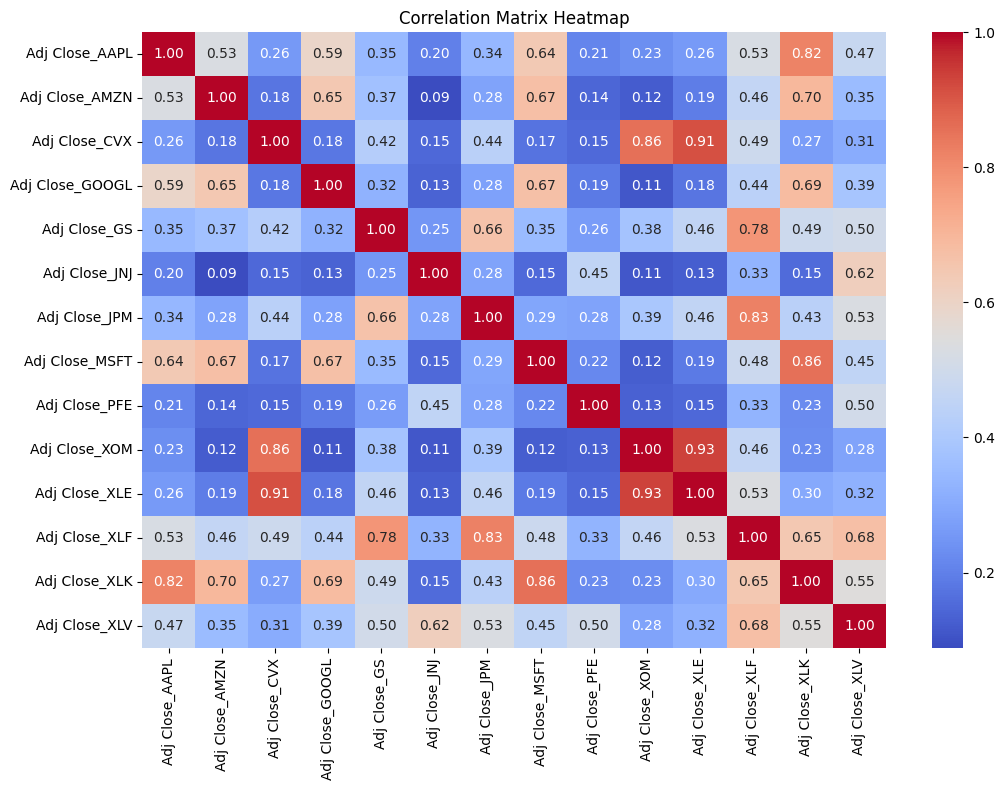

In [19]:
corr_matrix = log_returns_train.corr(method='pearson')

# Plot the correlation matrix as a heatmap, more visually appealling :)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### **Convert correlation into distance metric and perform clustering**
$$
d = \sqrt{\frac{1}{2} \left( 1 - \text{Corr}_{\text{value}} \right)}
$$


In [27]:
# Convert correlation matrix to distance matrix
D = np.sqrt(0.5 * (1 - Corr_train))
D.shape

(14, 14)

#### **Perfrom Heirachical Clustering (grouping similar stocks based off the distance metric)**

/tmp/ipykernel_42774/3640357493.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cluster = linkage(D, method='ward')


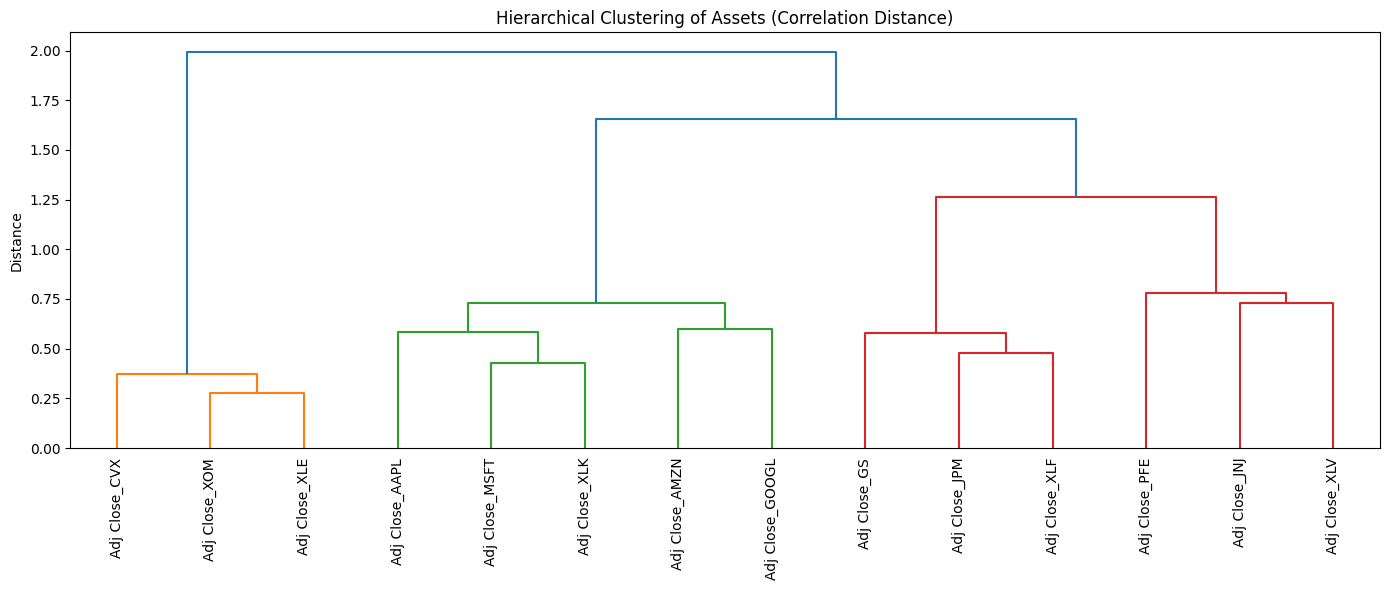

In [32]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram


D = np.sqrt(0.5 * (1 - Corr_train))

# Hierarchical clustering
cluster = linkage(D, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))  
den = dendrogram(cluster, labels=Corr_train.columns, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering of Assets (Correlation Distance)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

def cluster(D):
    model = AgglomerativeClustering(
        metric='precomputed', 
        linkage='single',
        compute_distances= True
    )
    model.fit(D)
    return model.children_
# much faster but more abstraction than the native implementation using the scipy linkage function

order the stocks along an axis (like the x-axis of dendrogram) so that similar ones sit next to each other and dissimilar ones are farther apart. This is can be done using **Iterative or recusrsive Matrix Seriation**. Luckily for us scipy linkage function as already seriated the stocks, so we can get the sorted order form this.

After this similar performing stocks becomes neighbours, this is a crucial steps as it will sort our stocks for **Recursive Bipartitioning process**

In [38]:
order = den['leaves']

In [39]:
order

[2, 9, 10, 0, 7, 12, 1, 3, 4, 6, 11, 8, 5, 13]

In [42]:
ordered_corr_matrix = Corr_train.iloc[order, order] # sorted correlation matrix

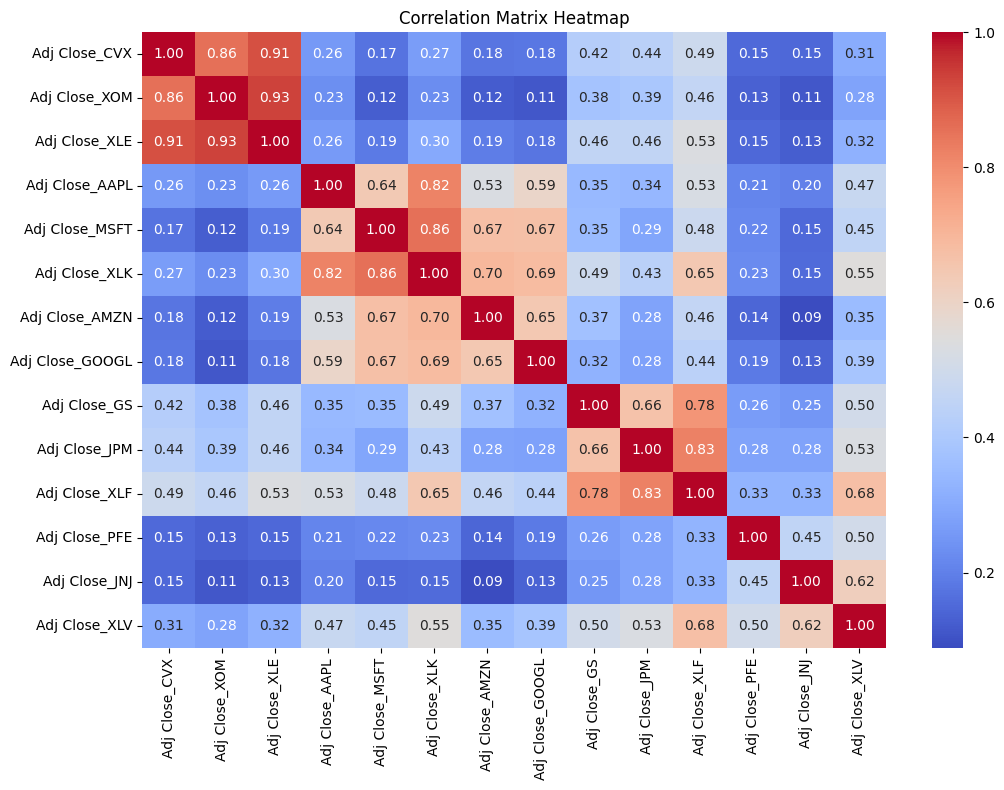

In [44]:
# Plot the sorted correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### **Recursive Bipartitioning**
This will enable us to allocate reliable and optimal portfolio weights with the help of clustering tree.

As we might know CoVariance is used to measure risk in the finance institution. This is because covariance measures the relative errors (variance measures mean deviation (errors)) of one quantity with respect to another, making a good way to access risk (through volatility of assets) of an asset and how it affect or is affected by another asset. 

now that we know which assets are similar from our matrix seriation, we will recursively split the sorted portfolio into two sub-cluster, at each split we will allocate to each halves weights inversely proportional to their risk (as measured with covariance) clusters with higher covariance have higher risk and recieve lower weights.

We continue spliting the each cluster produced frmo the previous clusters recursively and re-distributing weights accordingly. This ensures that each group of assets contribute equally to the overall portfolio risk, producing a balanced and diversified allocation.

This elegantly distributes portfolio weigh by continually balancing risk between clusters at each level of the heirachy.

In [61]:
import numpy as np

def get_cluster_var(cov, cluster_items):
    """Compute cluster variance given covariance matrix and indices."""
    cov_slice = cov[np.ix_(cluster_items, cluster_items)]
    w = 1 / np.diag(cov_slice)
    w /= w.sum()
    # portfolio variance = w.T Σ w
    cluster_var = np.dot(w, np.dot(cov_slice, w))
    return cluster_var

def recursiveBisection(cov, sorted_idx, weights):
    """Recursively assign weights using hierarchical risk parity."""
    n = len(sorted_idx)
    if n <= 1:
        return weights
    
    # Split cluster into left and right halves
    split = n // 2
    left_idx = sorted_idx[:split]
    right_idx = sorted_idx[split:]
    
    # Compute variances (risk) of each half
    var_left = get_cluster_var(cov, left_idx)
    var_right = get_cluster_var(cov, right_idx)
    
    # Compute allocation between the two halves
    alpha = 1 - var_left / (var_left + var_right)
    
    # Apply allocation weights
    weights[left_idx] *= alpha
    weights[right_idx] *= (1 - alpha)
    
    # Recurse into subclusters
    weights = recursiveBisection(cov, left_idx, weights)
    weights = recursiveBisection(cov, right_idx, weights)
    
    return weights


In [62]:
# cov_train = covariance matrix of log returns
# sort_order = list of asset indices from hierarchical clustering (seriation)
n = len(Cov_train)
weights = np.ones(n)
final_weights = recursiveBisection(Cov_train.values, order, weights)
final_weights /= final_weights.sum()  # normalize to sum to 1


In [53]:
hrp_weights = pd.Series(final_weights, index=Corr_train.columns[order])
hrp_weights = hrp_weights.sort_values(ascending=False)
print(hrp_weights * 100)


Adj Close_XLV      16.937478
Adj Close_PFE      11.801971
Adj Close_XLK      11.485563
Adj Close_XLE       8.235913
Adj Close_AMZN      7.286839
Adj Close_GS        6.443801
Adj Close_MSFT      6.349988
Adj Close_JNJ       6.117892
Adj Close_AAPL      5.690929
Adj Close_CVX       4.776299
Adj Close_GOOGL     4.226988
Adj Close_XLF       4.183319
Adj Close_JPM       3.972605
Adj Close_XOM       2.490415
dtype: float64


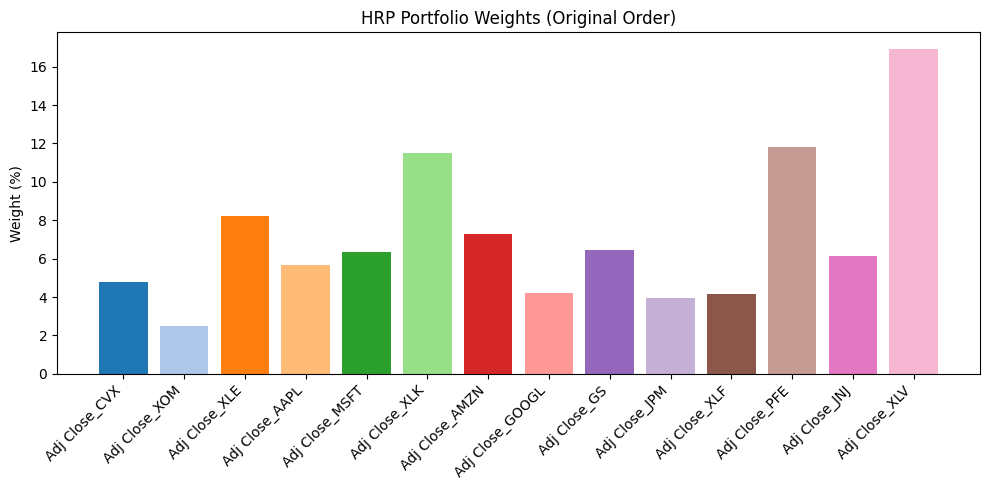

In [58]:
plt.figure(figsize=(10, 5))

hrp_weights = pd.Series(final_weights * 100, index=Corr_train.columns[order])

# plot directly
plt.bar(hrp_weights.index, hrp_weights.values, color=plt.cm.tab20.colors)
plt.title("HRP Portfolio Weights (Original Order)")
plt.ylabel("Weight (%)")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
